## Traffic Light Images Classification

#### 1. Import Libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

#Images, plots, display, and visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
import cv2
from PIL import Image
import pickle

import os
import math, random

import warnings

print("Tensorflow version ", tf.__version__)
print("TensorFlow Keras version ", keras.__version__)
print("OpenCV version ", cv2.__version__)

C:\Users\Praneet\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version  1.12.0
TensorFlow Keras version  2.1.6-tf
OpenCV version  4.0.0


In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
style.use('ggplot')

#### 2. Load the data

We are having the data inside the ```traffic_light_images``` folder. The images of green traffic light is inside the ```green``` folder, similarly the images of red traffic light is inside the ```red``` folder, and the images of yellow traffic light is inside the ```yellow``` folder.

In [3]:
# image dataset path
DATADIR = os.getcwd() + '\\traffic_light_images'

# List of categories
CATEGORIES = []
with os.scandir(DATADIR) as entries:
    for entry in entries:
        CATEGORIES.append(entry.name)
print(CATEGORIES)

['green', 'red', 'yellow']


In [4]:
data = []
input_img_x = 32 # width of the images
input_img_y = 32 # height of the images

def load_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # create path to green, red, and yellow light images
        class_num = CATEGORIES.index(category) # get the classification (0->green, 1->red, 2->yellow)
        
        for img in os.listdir(path): # iterte over each image of different categories
            try:
                img_array = cv2.imread(os.path.join(path, img)) # convert image to an array
                new_array = cv2.resize(img_array, (input_img_x, input_img_y)) # resize images to normalize data size
                data.append([new_array, class_num]) # add to out data
            except Exception as e:
                print("general exception", e, os.path.join(path,img))
                
            
load_data()

In [5]:
# total number of images we have
print("Total number of images we are having, including all the three categories: ", len(data))

Total number of images we are having, including all the three categories:  1484


Great, we have almost 1500 samples! That's awesome. It's time to shuffle out dataset.

In [6]:
# shuffle the data
random.shuffle(data)

In [7]:
# look at top samples of the data
for sample in data[:10]:
    print(sample[1]) # show the labels

1
1
0
0
1
1
0
1
1
0


In [8]:
# Get the percentage of each category in our dataset
total_len = len(data)
data_images = []
data_labels = []

for features, labels in data:
    data_images.append(features)
    data_labels.append(labels)


    
# convert list to dataframe
df_labels = pd.DataFrame({'labels': data_labels})


In [9]:
green_labels = df_labels['labels'].value_counts()[0]
red_labels = df_labels['labels'].value_counts()[1]
yellow_labels = df_labels['labels'].value_counts()[2]
print("Percentage of Green light images are: {}".format((green_labels / total_len) * 100))
print("Percentage of Red light images are: {}".format((red_labels / total_len) * 100))
print("Percentage of Yellow light images are: {}".format((yellow_labels / total_len) * 100))

Percentage of Green light images are: 36.118598382749326
Percentage of Red light images are: 60.91644204851752
Percentage of Yellow light images are: 2.964959568733154


61 percent of the data in out dataset belong to Red light labels (1). We need to split our data into training and testing data in a manner such that we are having equal portion of all the labels in both training and testing dataset.

In [10]:
# shape of our images
data_images[0].shape

(32, 32, 3)

The output tuple shows that we are having the image of 32 pixels of width, 32 pixels height, and in RGB format(colored).

<b>Visualize the images in our data</b>

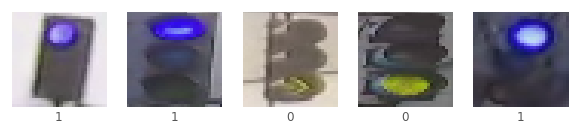

In [11]:
def display_images(num_of_images):
    plt.figure(figsize = (10, 2))
    for i in range(num_of_images):
        plt.subplot(1, num_of_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(data_images[i])
        plt.xlabel(data_labels[i])
        
display_images(num_of_images = 5)

In [12]:
# reshape our images and store then in a numpy array
data_images = np.array(data_images).reshape(-1, input_img_x, input_img_y, 3)

In [13]:
# Check the shape of reshaped images
data_images.shape

(1484, 32, 32, 3)

Let's save this data of reshaped images, so that we don't need to keep on performing the same task again and again.

In [14]:
try:
    with open('data_images.pickle', 'wb') as f:
        pickle.dump(data_images, f)
    
    with open('data_labels.pickle', 'wb') as f:
        pickle.dump(data_labels, f)
except Exception as e:
    pass

We can always load it in to our current script, or a totally new one by doing:

In [15]:
with open('data_images.pickle', 'rb') as f:
    X = pickle.load(f)

with open('data_labels.pickle', 'rb') as f:
    y = pickle.load(f)

In [16]:
X.shape

(1484, 32, 32, 3)

In [17]:
len(y)

1484

#### 3. Split the data